In [1]:
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
import matplotlib as plt

In [2]:
cancer = datasets.load_breast_cancer()

print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

##output of datasets.load_breast_cancer() is Bunch object, dictionary-like object with attributes
# data, target, feature_names, target_names, and few others 

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [3]:
print(type(cancer))

<class 'sklearn.utils.Bunch'>


In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=109)
print(len(X_train))

print(len(X_test))

##train_test_split by sklearn splits the array given into training and testing datasets, with correct labels for each 
# example.

455
114


In [5]:
X_train

array([[2.201e+01, 2.190e+01, 1.472e+02, ..., 2.432e-01, 2.741e-01,
        8.574e-02],
       [1.720e+01, 2.452e+01, 1.142e+02, ..., 1.899e-01, 3.313e-01,
        1.339e-01],
       [1.513e+01, 2.981e+01, 9.671e+01, ..., 6.575e-02, 3.233e-01,
        6.165e-02],
       ...,
       [1.611e+01, 1.805e+01, 1.051e+02, ..., 1.216e-01, 2.792e-01,
        8.158e-02],
       [1.048e+01, 1.986e+01, 6.672e+01, ..., 6.736e-02, 2.883e-01,
        7.748e-02],
       [1.729e+01, 2.213e+01, 1.144e+02, ..., 1.528e-01, 3.067e-01,
        7.484e-02]])

In [6]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
#StandardScaler() Standardizes features by removing the mean and scaling to unit variance
#SVC is an SVM written in C

from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) # define the pipeline object

# From Sklearn docs: 
#Pipeline of transforms with a final estimator.
#Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’,
#that is, they must implement fit and transform methods.

In [7]:

parameters = {'SVM__C':[0.001,0.1,1,10], 'SVM__gamma':[0.01, 0.1, 1]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

#GridSearch allows us to help tune hyperparameters for our SVM by exhaustively 
#generating candidates from parameter values specified by param_grids 

#cv=5 denotes that we are using 5-fold cross validation. Splits training data
#into 5 groups, 4 on which are trained on and last one is used for cross-validation 
#set for determing accuracy of each model. This is repeated for each fold and averaged 
#to get the accuracy for a given model with a specified set of hyperparameters. 

#Here, the default scoring is used. By default, parameter search uses the score function of the estimator 
#to evaluate a parameter setting

In [15]:
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print ("Accuracy = %1.2f" %(grid.score(X_test,y_test)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy = 0.98
Precision: 0.9736842105263158
Recall: 1.0
F1 score: 0.9866666666666666


In [16]:
print (grid.best_params_)

{'SVM__C': 10, 'SVM__gamma': 0.01}


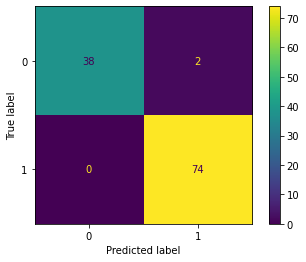

In [17]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display  = metrics.ConfusionMatrixDisplay(cm).plot()